In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default')

sns.set(style='whitegrid')

In [2]:
df = pd.read_csv('data/events.csv', low_memory=False)

# Análisis de productos del sitio según empresa fabricante.

Primero vamos a revisar a ojo, e ir ajustando nuestra función de clasificación para asignarle una empresa a cada modelo disponible en el dataset.

In [3]:
def asignar_empresa(celular):
    celular = celular.lower()
    if ('samsung' in celular):
        return 'Samsung'
    if ('iphone' in celular or 'ipad' in celular):
        return 'Apple'
    if ('sony' in celular):
        return 'Sony'
    if ('motorola' in celular):
        return 'Motorola'
    if ('asus' in celular):
        return 'Asus'
    if ('lg' in celular):
        return 'LG'
    if ('lenovo' in celular):
        return 'Lenovo'
    if ('quantum' in celular):
        return 'Quantum'
    return 'Otros'

In [4]:
modelo_por_empresa = df.loc[df['model'].notnull(), :].dropna(axis=1).copy()
modelo_por_empresa['timestamp'] = pd.to_datetime(modelo_por_empresa['timestamp']).dt.date
modelo_por_empresa['company'] = modelo_por_empresa['model'].apply(lambda x: asignar_empresa(x))
modelo_por_empresa.sort_values(by=['timestamp', 'company'], inplace=True)
modelo_por_empresa['company'].value_counts()

Apple       258499
Samsung     218127
Motorola     63518
LG            9724
Sony          7025
Lenovo        4779
Asus          2091
Quantum        520
Otros            1
Name: company, dtype: int64

Sólo por curiosidad, veamos qué modelo cayó en `Otros`.

In [5]:
modelo_por_empresa.loc[modelo_por_empresa['company'] == 'Otros']

,timestamp,event,person,model,company
906368,2018-05-16,lead,e5ebb7ac,Blackberry Blackberry Z30,Otros


## Filtramos por Viewed Product

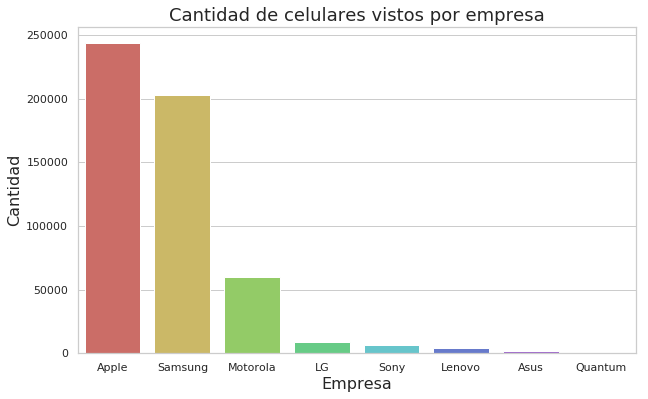

In [6]:
vistos_por_empresa = modelo_por_empresa.loc[modelo_por_empresa['event'] == 'viewed product']
celulares_vistos = vistos_por_empresa['company'].value_counts()
plt.figure(figsize=[10,6])
g = sns.barplot(x=celulares_vistos.index, y=celulares_vistos.values, palette='hls')
g.set_title('Cantidad de celulares vistos por empresa', fontsize=18)
g.set_xlabel('Empresa', fontsize=16)
g.set_ylabel('Cantidad', fontsize=16)
plt.show()

In [7]:
samsung_vistos = vistos_por_empresa.loc[vistos_por_empresa['company'] == 'Samsung']['timestamp'].value_counts()
apple_vistos = vistos_por_empresa.loc[vistos_por_empresa['company'] == 'Apple']['timestamp'].value_counts()
motorola_vistos = vistos_por_empresa.loc[vistos_por_empresa['company'] == 'Motorola']['timestamp'].value_counts()
sony_vistos = vistos_por_empresa.loc[vistos_por_empresa['company'] == 'Sony']['timestamp'].value_counts()
quantum_vistos = vistos_por_empresa.loc[vistos_por_empresa['company'] == 'Quantum']['timestamp'].value_counts()

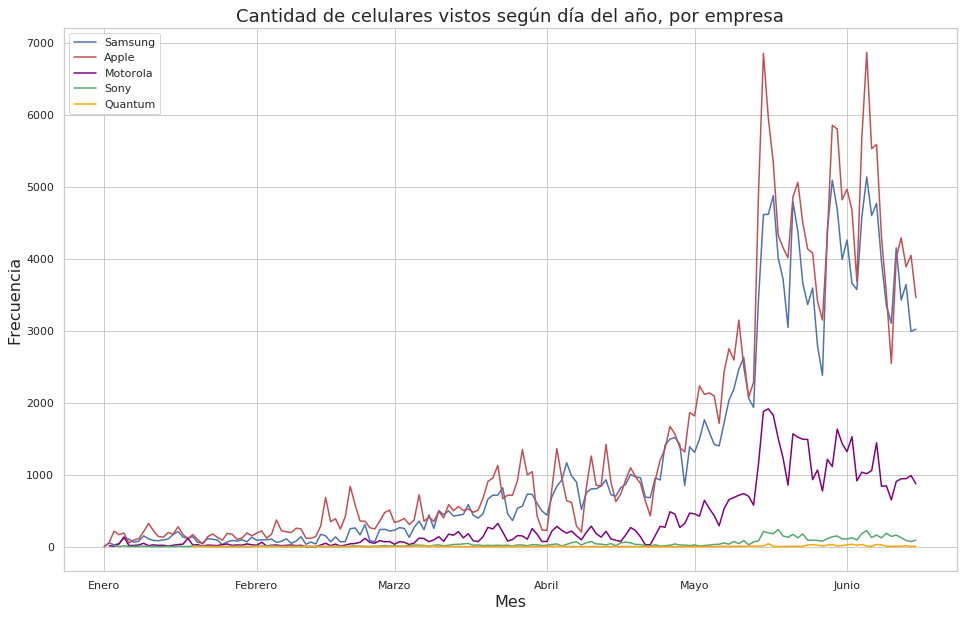

In [13]:
plt.figure(figsize=[16,10])
g = sns.lineplot(x=samsung_vistos.index, y=samsung_vistos.values, color='b')
g = sns.lineplot(x=apple_vistos.index, y=apple_vistos.values, color='r')
g = sns.lineplot(x=motorola_vistos.index, y=motorola_vistos.values, color='Purple')
g = sns.lineplot(x=sony_vistos.index, y=sony_vistos.values, color='g')
g = sns.lineplot(x=quantum_vistos.index, y=quantum_vistos.values, color='Orange')
g.set(xticklabels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio'])
g.set_title("Cantidad de celulares vistos según día del año, por empresa", fontsize=18)
g.set_xlabel('Mes', fontsize=16)
g.set_ylabel('Frecuencia', fontsize=16)
plt.legend(['Samsung', 'Apple', 'Motorola', 'Sony', 'Quantum'])
plt.show()

## Filtramos por Conversion

Ahora queremos ver cuántos productos fueron comprados, según empresa.

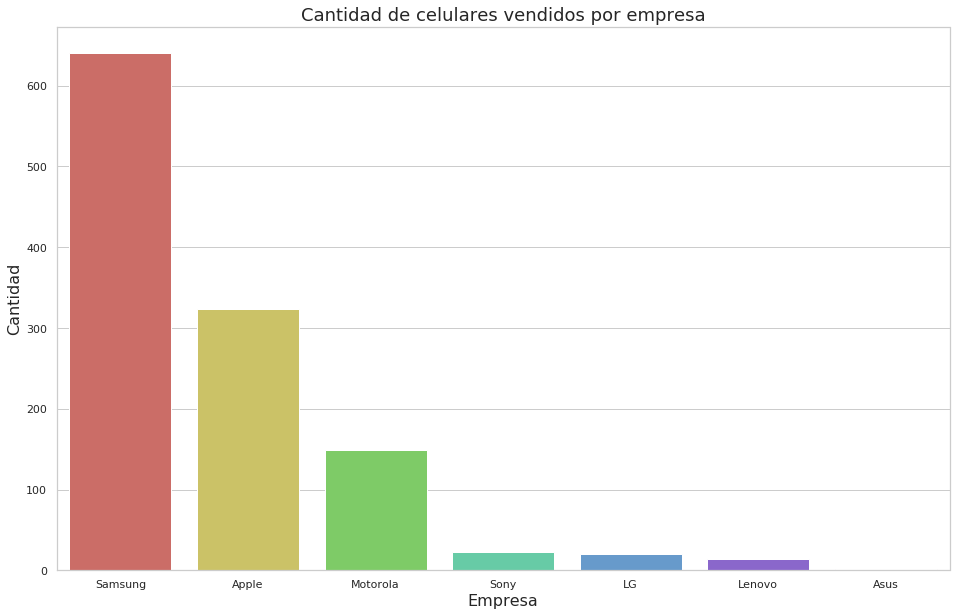

In [14]:
conversion_por_empresa = modelo_por_empresa.loc[modelo_por_empresa['event'] == 'conversion']
vendidos = conversion_por_empresa['company'].value_counts()
plt.figure(figsize=[16,10])
g = sns.barplot(x=vendidos.index, y=vendidos.values, palette='hls')
g.set_title('Cantidad de celulares vendidos por empresa', fontsize=18)
g.set_xlabel('Empresa', fontsize=16)
g.set_ylabel('Cantidad', fontsize=16)
plt.show()

In [10]:
samsung_vendidos = conversion_por_empresa.loc[conversion_por_empresa['company'] == 'Samsung']['timestamp'].value_counts()
apple_vendidos = conversion_por_empresa.loc[conversion_por_empresa['company'] == 'Apple']['timestamp'].value_counts()
motorola_vendidos = conversion_por_empresa.loc[conversion_por_empresa['company'] == 'Motorola']['timestamp'].value_counts()
sony_vendidos= conversion_por_empresa.loc[conversion_por_empresa['company'] == 'Sony']['timestamp'].value_counts()
lg_vendidos = conversion_por_empresa.loc[conversion_por_empresa['company'] == 'LG']['timestamp'].value_counts()

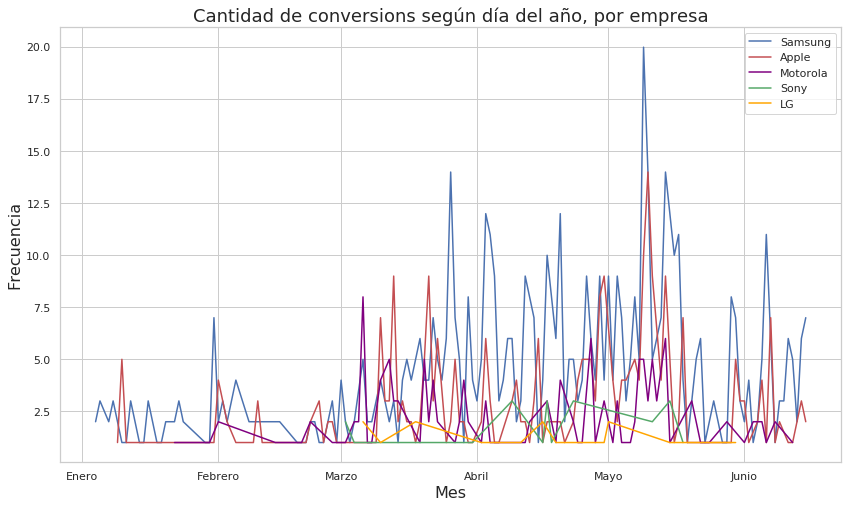

In [11]:
plt.figure(figsize=[14,8])
g = sns.lineplot(x=samsung_vendidos.index, y=samsung_vendidos.values, color='b')
g = sns.lineplot(x=apple_vendidos.index, y=apple_vendidos.values, color='r')
g = sns.lineplot(x=motorola_vendidos.index, y=motorola_vendidos.values, color='Purple')
g = sns.lineplot(x=sony_vendidos.index, y=sony_vendidos.values, color='g')
g = sns.lineplot(x=lg_vendidos.index, y=lg_vendidos.values, color='Orange')
g.set(xticklabels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio'])
g.set_title("Cantidad de conversions según día del año, por empresa", fontsize=18)
g.set_xlabel('Mes', fontsize=16)
g.set_ylabel('Frecuencia', fontsize=16)
plt.legend(['Samsung', 'Apple', 'Motorola', 'Sony', 'LG'])
plt.show()